In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

In [2]:
url = "E:/mousita/ML/KNN/iris.csv"

# Assign colum names to the dataset
n = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=n)  

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [5]:
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=39)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=39, p=2,
           weights='uniform')

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9565217391304348

In [11]:
y_pred_val = classifier.predict([[6.12,5.23,3.20,2.2]])

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
confusion_matrix(y_test,y_pred)

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  4]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.80      1.00      0.89         4

    avg / total       0.97      0.96      0.96        23



In [12]:
#to find the K value
error = []

# Calculating error for K values between 1 and 40
for i in range(3,100,2):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_y_test = knn.predict(X_test)
    error.append(np.mean(pred_y_test != y_test))

In [13]:

plt.plot(range(3, 100,2), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

Text(0,0.5,'Mean Error')

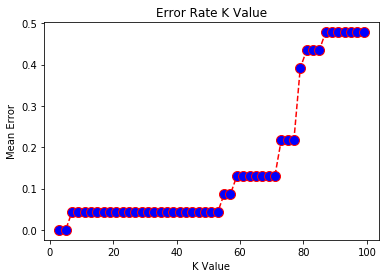

In [14]:
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
ts_score=[]
for j in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X,y , random_state =j,test_size=0.15)
    lr = KNeighborsClassifier().fit(X_train, y_train)
    ts_score.append(lr.score(X_test, y_test))

J = ts_score.index(np.max(ts_score))

In [9]:
J

1